# Eletromag - Projeto

### Import bibliotecas

In [86]:
from math import *
from cmath import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

In [87]:
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

## Etapa 01

### Parâmetros adotados

In [158]:
kr = 12.3

r1 = 148.5e-3*kr
r2 = 147.8e-3*kr
rc = 1000
l1 = 69.04e-6
l2 = 69.81e-6
c1 = 4.7e-6
c2 = 4.7e-6
k = 0.1

### Cálculo da Frequência de Ressonância LC

In [159]:
w = 1/sqrt(l1*c1)
Fr = w/(2*pi)

In [160]:
print(f'Frequência de Ressonância: {abs(Fr)} Hz')

Frequência de Ressonância: 8835.290049466686 Hz


### Cálculos fasoriais

In [161]:
m = k*sqrt(l1*l2)
xl1 = 1j*w*l1
xl2 = 1j*w*l2
xc1 = 1/(1j*w*c1)
xc2 = 1/(1j*w*c2)
xm = 1j*w*m

In [162]:
def CalcularTransformador(v1, rc):
    Z2 = (xc2 * rc) / (xc2 + rc)
    Z=np.array([[r1+xl1+xc1, -xm],[-xm, xl2+r2+Z2]])
    V=np.array([v1,0])
    I=np.dot(linalg.inv(Z),V)
    V2 = I[1] * Z2
    return I[0], I[1], V2

In [163]:
v1 = (6*2)/pi
i1, i2, v2 = CalcularTransformador(v1, rc)
v1ef = v1/sqrt(2)
i1ef = i1/sqrt(2)
v2ef = v2/sqrt(2)
i2ef = i2/sqrt(2)
#s2 = v2ef * i2ef.conjugate() 
s2 = v2ef**2 / 1000
print(f'Corrente i1: {round(abs(i1),4)} A, Corrente i2: {round(abs(i2),4)} A')
print(f'V2: {round(abs(v2),4)} V')
print(f'S2: {round(abs(s2),4)} W')

Corrente i1: 2.0024 A, Corrente i2: 0.421 A
V2: 1.6135 V
S2: 0.0013 W


### Plot de gráficos

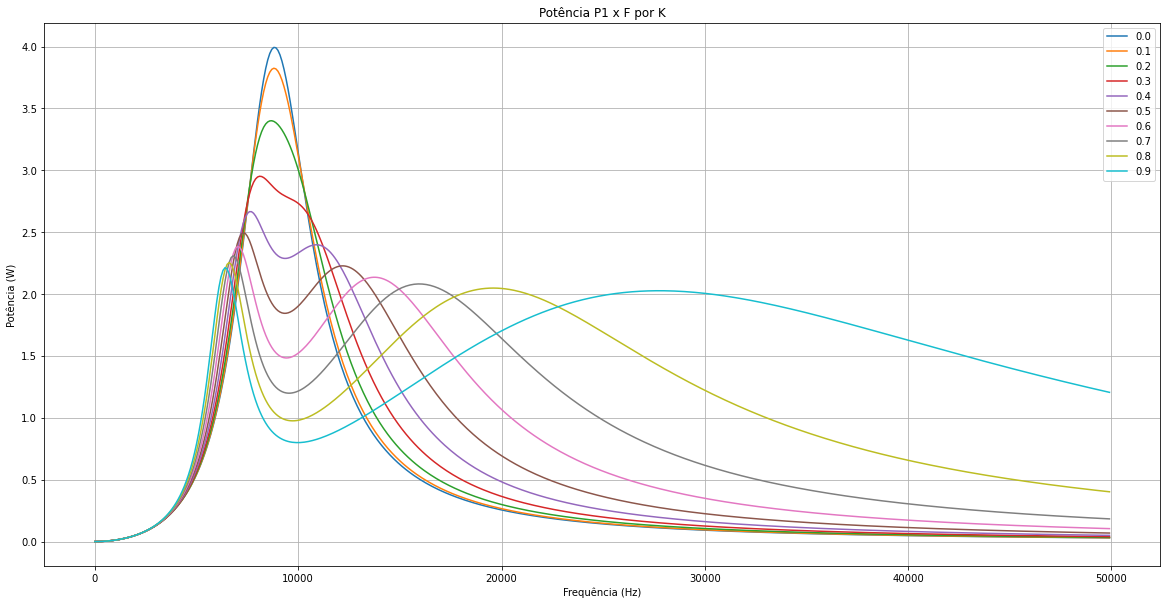

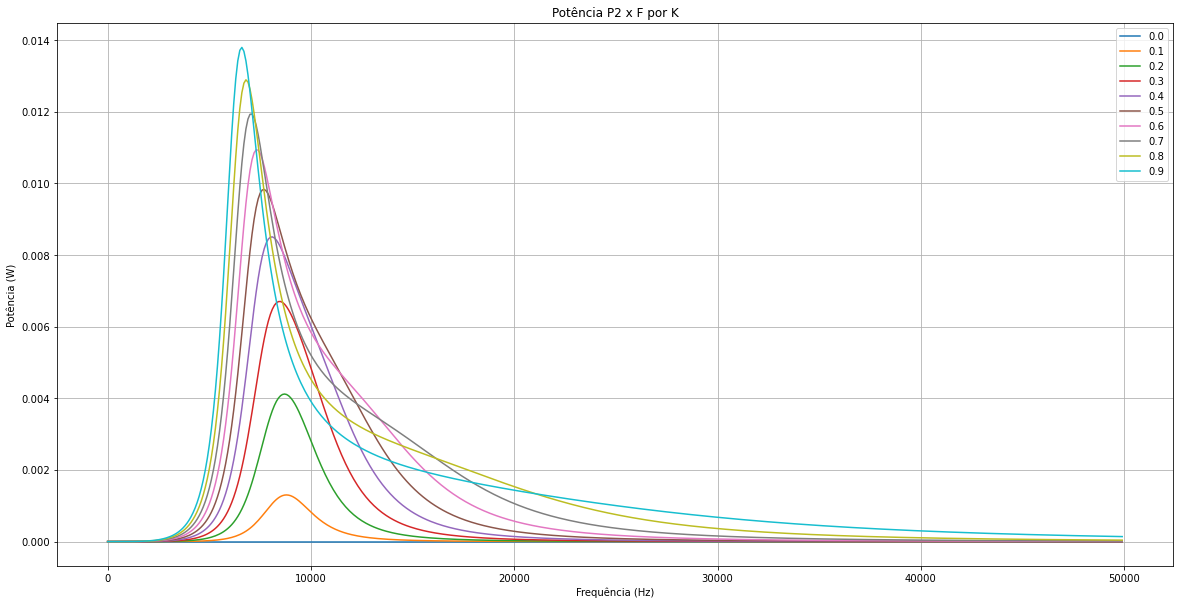

In [166]:
%matplotlib inline

k_list = np.arange(0,1,0.1)
s1_list_list = []
s2_list_list = []

for k in k_list:

    s1_list = []
    s2_list = []
    f_list = np.arange(1, 5e4, 100)

    for f in f_list:
        w = 2*pi*f
        m = k*sqrt(l1*l2)
        xl1 = 1j*w*l1
        xl2 = 1j*w*l2
        xc1 = 1/(1j*w*c1)
        xc2 = 1/(1j*w*c2)
        xm = 1j*w*m

        i1, i2, v2 = CalcularTransformador(v1, rc)
        v1ef = v1/sqrt(2)
        i1ef = i1/sqrt(2)
        v2ef = v2/sqrt(2)
        i2ef = i2/sqrt(2)
        s1 = v1ef * i1ef.conjugate()
        s2 = v2ef * i2ef.conjugate()

        s1_list.append(s1.real)
        s2_list.append(s2.real)
        
    s1_list_list.append(s1_list)
    s2_list_list.append(s2_list)

fig = plt.figure(figsize=(20,10))
for i in range(len(s1_list_list)):
    plt.plot(f_list, s1_list_list[i], label=f"{round(k_list[i],1)}")

plt.title('Potência P1 x F por K')
plt.legend()
plt.grid()
plt.xlabel("Frequência (Hz)")
plt.ylabel("Potência (W)")

plt.show()

fig = plt.figure(figsize=(20,10))
for i in range(len(s1_list_list)):
    plt.plot(f_list, s2_list_list[i], label=f"{round(k_list[i],1)}")

plt.title('Potência P2 x F por K')
plt.legend()
plt.grid()
plt.xlabel("Frequência (Hz)")
plt.ylabel("Potência (W)")

plt.show()

In [165]:
k_list = np.arange(0,1,0.01)

s1_max_list = []
f_s1_list = []
k_s1_list = []

s2_max_list = []
f_s2_list = []
k_s2_list = []

for k in k_list:

    s1_dic = {}
    s2_dic = {}
    f_list = np.arange(1, 5e4, 100)

    for f in f_list:
        w = 2*pi*f
        m = k*sqrt(l1*l2)
        xl1 = 1j*w*l1
        xl2 = 1j*w*l2
        xc1 = 1/(1j*w*c1)
        xc2 = 1/(1j*w*c2)
        xm = 1j*w*m

        i1, i2, v2 = CalcularTransformador(v1, rc)
        v1ef = v1/sqrt(2)
        i1ef = i1/sqrt(2)
        v2ef = v2/sqrt(2)
        i2ef = i2/sqrt(2)
        s1 = v1ef * i1ef.conjugate()
        s2 = v2ef **2/1000

        s1_dic[f] = s1.real
        s2_dic[f] = s2.real
        
    f_s1_list.append(max(s1_dic, key=s1_dic.get))
    s1_max_list.append(max(s1_dic.values()))
    k_s1_list.append(k)
    
    f_s2_list.append(max(s2_dic, key=s2_dic.get))
    s2_max_list.append(max(s2_dic.values()))
    k_s2_list.append(k)


In [114]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

In [115]:
%matplotlib
fig = plt.figure(figsize=(14,10))

ax = plt.axes(projection='3d')

# Linha de plot3D
ax.plot3D(f_s2_list, k_s2_list, s2_max_list);
ax.set_xlabel('Frequência (Hz)')
ax.set_ylabel('K')
ax.set_zlabel('Potência de saida (W)');

# Encontrando valores do ponto de maior potência
max_s2 = max(s2_max_list)
index_max_s2 = s2_max_list.index(max_s2)
max_s2_f = f_s2_list[index_max_s2]
max_s2_k = k_s2_list[index_max_s2]

ax.scatter3D(max_s2_f, max_s2_k, max_s2, c="r", s=50);

ax.text(max_s2_f, max_s2_k, max_s2 + 1, f'f: {max_s2_f} Hz\nK: {max_s2_k}\nS2: {round(max_s2, 3)} W',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10});

Using matplotlib backend: MacOSX
